# Imports

In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

from src.data.data_fetcher import EvalDataFetcher
import matplotlib.pyplot as plt
%matplotlib inline

# Fetching new data

In [2]:
# Create data fetcher
fetcher = EvalDataFetcher()

# Fetch evaluation data
print("Fetching evaluation data...")
eval_data = fetcher.fetch_evaluation_data()
print(f"Retrieved {len(eval_data)} rows")

Fetching evaluation data...
Retrieved 403 rows


In [3]:
# Display sample data
print("\nSample data:")
eval_data.head()


Sample data:


,score,item_id,createdBy_id,sourceText,targetText,targetID
0,76,1,1,"""We now have 4-month-old mice that are non-dia...","„ახლა გვყავს 4 თვის არადიაბეტური თაგვები, რომლ...",google_sheet
1,76,2,1,"""We now have 4-month-old mice that are non-dia...","""ახლა ჩვენ გვყავს 4 თვის თაგვები, რომლებიც არ ...",kona
2,41,3,1,"""We now have 4-month-old mice that are non-dia...","""ჩვენ ახლა გვაქვს 4 თვის ძაღლები, რომლებიც არ ...",small100
3,89,4,1,"Dr. Ehud Ur, professor of medicine at Dalhousi...","დოქტორმა ეჰუდ ურმა, დალჰაუზის უნივერსიტეტის მე...",google_sheet
4,98,5,1,"Dr. Ehud Ur, professor of medicine at Dalhousi...","დოქტორმა ეჰუდ ურმა, ჰალიფაქსში, ნოვა შოტლანდია...",kona


In [4]:
# Basic statistics
print("\nBasic statistics:")
eval_data.describe()


Basic statistics:


,score,item_id,createdBy_id
count,403.000000,403.000000,403.000000
mean,58.528536,226.069479,17.885856
std,33.199323,150.461380,16.785651
min,0.000000,1.000000,1.000000
25%,25.000000,101.500000,1.000000
50%,71.000000,202.000000,34.000000
75%,86.000000,302.500000,35.000000
max,100.000000,500.000000,36.000000


In [5]:
# Add reference text
print("\nAdding reference text...")
reference_file = '../data/flores_devtest_google_sheet.csv'
complete_data = fetcher.add_reference_text(eval_data, reference_file)


Adding reference text...


In [6]:
# Display sample of complete data
print("\nComplete data with reference text:")
complete_data.head()


Complete data with reference text:


,score,item_id,createdBy_id,sourceText,targetText,targetID,referenceText
0,76,1,1,"""We now have 4-month-old mice that are non-dia...","„ახლა გვყავს 4 თვის არადიაბეტური თაგვები, რომლ...",google_sheet,"„ჩვენ ახლა გვყავს 4 თვის ასაკის თაგვები, რომლე..."
1,76,2,1,"""We now have 4-month-old mice that are non-dia...","""ახლა ჩვენ გვყავს 4 თვის თაგვები, რომლებიც არ ...",kona,"„ჩვენ ახლა გვყავს 4 თვის ასაკის თაგვები, რომლე..."
2,41,3,1,"""We now have 4-month-old mice that are non-dia...","""ჩვენ ახლა გვაქვს 4 თვის ძაღლები, რომლებიც არ ...",small100,"„ჩვენ ახლა გვყავს 4 თვის ასაკის თაგვები, რომლე..."
3,89,4,1,"Dr. Ehud Ur, professor of medicine at Dalhousi...","დოქტორმა ეჰუდ ურმა, დალჰაუზის უნივერსიტეტის მე...",google_sheet,"ჰალიფაქსის, ახალი შოტლანდიის დალჰუსის უნივერსი..."
4,98,5,1,"Dr. Ehud Ur, professor of medicine at Dalhousi...","დოქტორმა ეჰუდ ურმა, ჰალიფაქსში, ნოვა შოტლანდია...",kona,"ჰალიფაქსის, ახალი შოტლანდიის დალჰუსის უნივერსი..."


# Visualizing data

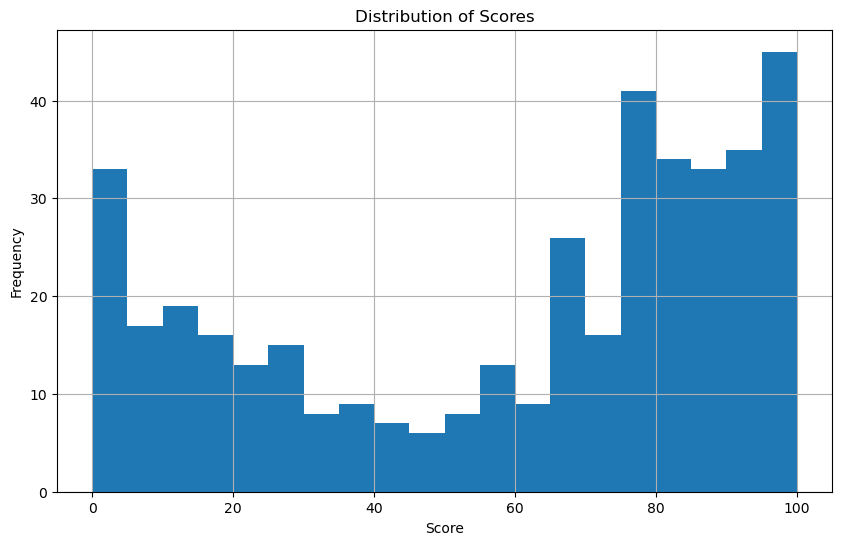

In [7]:
plt.figure(figsize=(10, 6))
complete_data['score'].hist(bins=20)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()